In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from urllib.request import urlretrieve
from pylab import rcParams


In [54]:
class detecting_faces():
    def __init__(self,image_url,image_name):
        self.image_url=image_url
        self.image_name=image_name
        urlretrieve(self.image_url,self.image_name)
        self.image_object=cv2.imread(self.image_name)
        self.image_process()
        self.Face_Detector()
        
    def image_process(self):
        image=self.image_object
        self.processed_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        rcParams['figure.figsize']=12,10
        fig=plt.imshow(self.processed_image,cmap='gray')
        plt.title('preprocessed actual image:'+self.image_name)
        plt.axis('off')
        plt.show()
        
    def Face_Detector(self):
        self.haarcascade_url='https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
        self.haarcascade_name='haarcascade_frontalface_default.xml'
        urlretrieve(self.haarcascade_url,self.haarcascade_name)
        image_detect=cv2.CascadeClassifier(self.haarcascade_name)
        faces_list=image_detect.detectMultiScale(self.processed_image)
        for faces in faces_list:
            (x,y,w,h)=faces
            cv2.rectangle(self.processed_image,(x,y),(x+w,y+h),(0,255,0),(3))
        plt.imshow(self.processed_image,cmap='gray')    

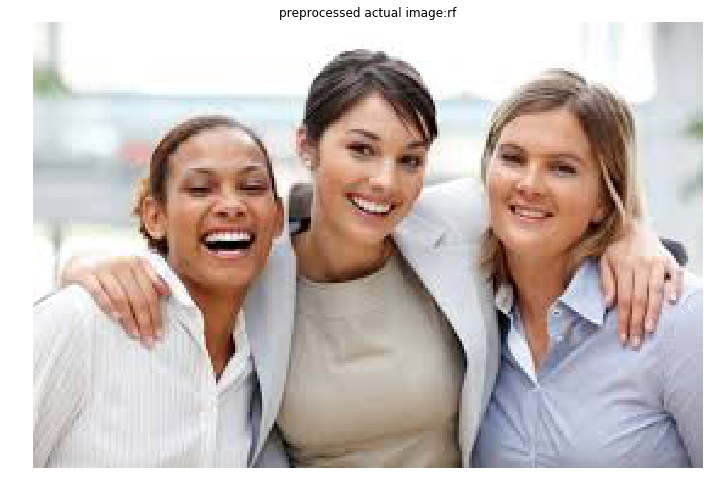

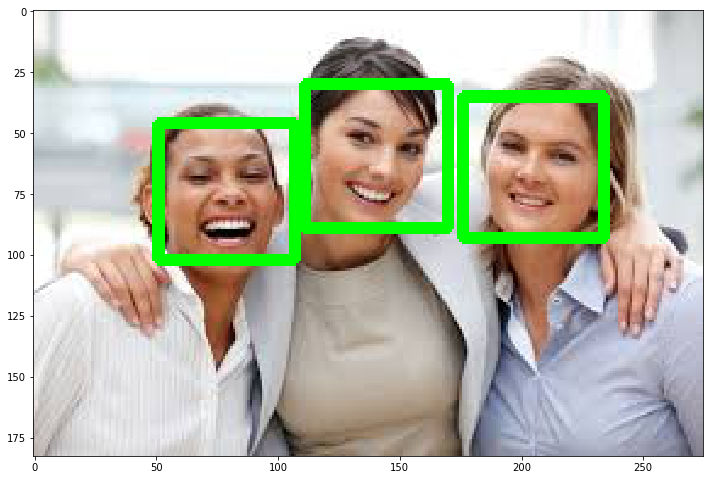

In [56]:
p=detecting_faces("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhIWFhUVFxgXFRUXFhcXFxYXFRYYFhUXFhcYHSggGBolGxYXITEhJSkrLi4uGB8zODMsNygtLisBCgoKDg0OGhAQGi0lICUtKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0rLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAAIDBAYHAQj/xABDEAABAwEFBQUGBAQEBQUAAAABAAIDEQQFEiExBkFRYXETIoGRoRQyscHR8AdCUuEjYnKCM5LC8RUWNKLiF0NzstL/xAAZAQACAwEAAAAAAAAAAAAAAAAAAgEDBAX/xAAmEQACAgICAgICAgMAAAAAAAAAAQIRAyESMQRBIlEyYXGxExSR/9oADAMBAAIRAxEAPwDsd4N7pSutvdTLXKC0qS7fdQg9l1JJJACSSSQAkkkkAJJJJACSSSQAkkkkAJJJCL/2gjsrauDnvpURtpipWlTU0AQAXSXPP/UhzjQRMYd4MgefQtp6qxafxJijaMUdXnUNcKU9c+SCaN2khd2X/BOxr2PHeA7pyIPA80UQQJJJJACSSSQAkkkkAJJJJAETNSmWjcpWjVMmClEPofEMlUvMd0q63RVrwb3CoJMaITiV1rMk8x5qQNUilfAvVLhSQBQnvE0R/Z61hzeYWYfd7sSv2Br4zVuh1Coi5eyFLZskkMivGo0Ke68ORV1DWggkhwvIcCpWXg3fVTTI5IuJKv7Yzj6Je2M4opk8kWElX9sZxS9sZxRTDkiwkq/tjOK99rZxRQWidJQe1M4r32lvFRQWgDtrtXHYYs+9M+vZRgVJpq48GivyXCr0vS0WmRzpX5k1NcyOZrQN9ET/ABD2gMtumw94tPZtOdGtZllTniPispZrWQ7ujE6up91p/lGlefw1UMdINvuugDiaAe8a58gK6VUlkmicKMbgeDljDXYvPeomSkgBxxPO7XD0Gg669US/5ak7EvwmmtM69Qdx58krkkWKDfREb+I7kjcQG5oDXCm8DQ+YXQdiNsQ7CztO0jqGkOykiJNASDq37Fd/H7fm3NxxDfTPxz1Q+yW5zJGvY5zZG6OqAHcjxBU2K16Z9cpLJfhvtULdZcTspYjgkbzpVp5gjfyWofaGjemK3olSVaO2tPJWA4FAHqa94GqpXneLYhqK8Fz++9o5Hk0Pd6kfAYfVK5UNGNm4tt6ub7oZTm76IWzbDC6ksJA/Ww4m+I1HqOi5pab2kBJ7p8W5+GMn0Xljvx7nZNIpTve82u7EDQkdEnJlnBHcLHamSsD43BzToQpXBc4sd6PgYaYW4iHUFaYjkctwPEIzcu17XuDJMiTQV/VwJ3g7in5FbgzYKO0Nq09F7DKHCrTULyd4DTVMKzPuavcKe4JJhSKiSekoAmkYE6OMLx5UkIqpFJ2RhevYE9rF66EKQKoY1PDAoZ+6UwTqbFouYAmlrUPtt4siY6SRwa1upP3qudbQ7fOOTKtadADmdwrvz4BVzyKJbDE5/wAHS5rZCzJz2g8KqNt5WcmgkHr8Vy26rrtdp7z6xt1FQK58/qFoLFso1o77iTxBp6BJ/lZb/ro3zA05gghP7Nqz1hu6WNv8KTEf0u0P06qzd95doXMcMMjTRzN4P0VqlZTLG0GOzCitZDY3u/S1x8gSvRGgG2ErxCYmsxiWrXZ0o2nezUSkkrCGOUpUj51ttsL3Ghycak73Z8eFfveZrta5zgyMd45Cm7mvXXc6ScRMBq51BrpXKvguu7P7JRWZgyBdTNx4qjJOjVjhb2DNl9lQwB8mblugG4MFMqIPLbnxjuwhwH84DvKnzTbDtNBK7BQsf+h4ofDiqf2aDI7ZXAGu7RratcaPA1z0cOe7nlwWBN2udJ2QPecCY/5iBXDyJFac+q7nb2te0tIBBGfisFtHcRLO0iNJYnYgeOE1B68efVTHJQSx8kL8EbU422SOvvQuxjnG5uB3hicP7l272cLhP4fteL5jmhaezmYS+n5BLG5xB4Ue2nku8NYVrhLRzssfkN9mChtsvZNqNSaDhxJPIBWSwrEbcX25szbOwVcGYzkaVe7CwE8Mi6m8hqMk6jojHG5AfaO93ySdlGSXHcMyN9SBqd9N2vQfDs7PXE5lTxc6vpuWvu+6GQjjIc5HnVzt9TwruV4s5rG2zowikjDnZOSQ/wARwpwH1K9vO6vZox2YybmeNVs3NIzQq8jiBaUjm0WKCZzj/jxcSKktOo/SeSuQXhUUNc8stz26EddPFA75sBimcPynNqhhlIpT7IV3K0UONOjsGxu0LnuEeI0kbiYdO83J7T96ELWuLicySuWbLgiWJ7fdxteOHe7r/wDuoupvdmrsMrRlzKmItUEzw1Pe5CL0e8ijQrG6RUTutqSyz2zV94pKr/J+iNmxdPVTWe00QhsbuKeGu4q8DRC3NCl9saRqsz3uKkaSAgC5eFpqclSExUFokKbG89AM1VNPs1YpwSpo57t1tK6SUxNFWREtaK5Ok0LiORq0eJ3r3ZK4MjLaG4nk1aDnhHLmsjbJMdoA17xPU1qT8V1G6HjswX7h9hZpf2aY1/wMWC107tMlblnNEAtO0PZHuQYhxDx8CApbLtA2UVw0PApLr2PVvoJutrmmra5IBel6vErbU0fxI/eGnaR/maee8dE+8r+wZNZiO4aDxVCO2mQHtmxtLv0YqivGpopjL9kSgvo6hZrU17Q5pqCAR0IqgG2cRkjDWk5mmXMg0PAZaqL8OT2tiaCauie+J3Isd3a/2lq0M13ggtOhWp/JGOLcJ2cpuu6GxWthIz72Rpl0O8Lc2iLGKVog9vsJZaS92EBvuhooPdA03b9Fbs14LHN09m6C5K0YXaayW+OQ9nO0jc2mE05AmjlLds0uOkjcdCKSYMNQeW4grdWp8bx3wCnWOxxmmADXcpu1QbTtgW8rV2TcTsuFVkZLc2d9faiG6BrKDwqVtdtrtbMGxuGXlupuWPsmyLQ5raFrGuxVFK1pQd4505KIpK9g23WjpP4b7OMs0BeBV8pri34AThB4Zkk9VtWtQi65GxxMZXRo896IMtbeK2JaOdN22TuYuW22ymS3zWr8jQTmMqxHs4gP7quXTZLQKHoVjroeOxGL8xNcq5NJaPmlm0PiVswM+1hDqi0guBoWkChI1AAoVorpv3tWYjkd9Mx4FSXtsRBKS6jTXM5AHPgRRS3PcrLNC8AE8CeKyzX0b4v7I59oo25Od6FVHX5E80qRXiCPigt8XVO52JrqNOuvpRDbEbYxwZLGySMmhLTWnPM1KiMW1bGlJJ0TbXxg4TTQ68is46EtyIoQQPA5A+oWyt9irGRTLdXdyWWvF1WRuH5w5leEkRw+oAPgeKIt9CzSNp+HjKwkHVjsuhIPxFfFdLw5rmX4bT4hIeJGXA1FR51XUCteBmDP2Mc1MMIKlKjfKAr2UFV9jbXRJVZbxFTmklIstiEL3sQvEkxJ72ITTCE8J2SAKUlnqg+0srY46VNToBvrlTnqFoXLE39M+W0UAc3A2jHcauaC4cMsvFZvKfxo0+JC5nN7FCfbBiGWKgr1XRb4gl7MNibXKpzos/bLA32kPBxYHtD3DiaHM8dPRbX2hoIqs8ppm2ONxZz2e9LTTs/Z260r2oxf5cKObL3fIHgyggEaHceu9aS3XjExuLAK7uJKG/8AMcUNO2ccbvy4XFreAJAPmock9Dxi1YJ2quycSViApwNRXXgDyQU2m1yEAxsG7umX1xCnotle20URc2N3dLhVpbU9K5Up1Xtjt7XNIIo4ZFClx0HBvbCX4VOMctrheRVxinA5Oj7Nx/zRleX9thKLS+ONzWxxmm4kkarNQzYLbZ5W6hwYf6XOoPV7istfFqJtMpz/AMV/o4hacc+SMWbG4y37Og2i9zM0PJqcRaTSm4H5qk+Uirs8s1Tu7/pmZ5kud44qf6VdsxqOqy5vyNeDUChZr6ZK6hkyBpShAqN2iMx3xLDRsWEsHPiakIe6B0Ly+NjHB/vxPyY40IxB1DgdRx5GmdNU+2WywU7zZoD3iRgc4ZaAFtRzyTKGrQzl9p/2XbwvoSOz1FNE9ji9zI25l7gB47/DVZWGJ0khMTiIKANLmkPcfzOofdG4VzyWzuKIs/iU5NPAb+lUQg5ToXJOMI2bSK7Ixq9zuWgV6KKNvutHXU+qD2a11VsTro0ckuWl1Ry+9FgrztHZSYG+7mR0c5x+a2D7SsftGwF7Typ61+az+QvjZp8V/MHTXy7EKVcBm5oNCRwCkdtM10QxDCK6UNR1Aqg9os88UrDE1hjfXG4guc0gVbkNWnRTOsJf38LHVof4cgpnyOhWNJ0dL4+w1YL0jJw5Ebj8lbtBZuAWLFvYJOyaaSNzwHXmMskZNpOSXk1oOCY+8XANPisBYLP7Q20WMe+f49nPCRmrRwxDLzWtvOcltOOQ8VhZscVqY+N3fY4OJGQoM3eBFQrMb2VZY6Nn+FriI3l2RxNrXI1qa155LrQ3HiFz+yxtaHzRjuzYZQBuLhhcD/diPit5YZMUTDyotOF/Iw51qyR6EWt7iaBGHKH2cVqtLMoAfdhJqktHgCSWgpDrXZQBkqFibiJ5FaaaMOBBQq47Fhxk/qNOiXYx77AEx1g6ot2gXocOCN/ZNAJ9gdxWQ23mNnfA94pES5skuQawuoGV/uoegK6ZQIbtBdzJ7PJFha4ua4NqAQHEEA59UuSLkqHxS4STOa2qxNibiIAxuzzBFTQClNdxTLQ4grB7R3TbbHLCx5kcxrmlg74aKOpQYhwpplmtvaJu94D4LDkxuKOnjy8mDLzvBrHh0jgGtFc+Jy81fZI+cDDZZHDKjqAVqcI15hCr0u4zPDmuwPYMUbiMTcQP5m7wq0Fp2iJOC0MbhoMuxDTzBc2hOX3VNhgpLsnJklHqNhiS7Jm5+zS79c9HBvxKHWS343PI1GRGhB4FVLfJtCW1ltjQK6NdFXWpJ7NunVOuyxmJpL3F0khxyOP5nGpJ6JskIxWiMeScntUF7qsrpLRHTc9tejTid8FktsbGztZorO17pnSuLiCaNq4uNSchquqbN9yFuQxOBcTTOjiSBXflRZPaOydna3SHSUBw6gYXfCvir4p48d/ZknJZclfRXuGzuis8ULj3mtOLOubnFxz8URs8pY6h0Q32jv14oq0ggLHJ3s1RVKg5Hge3WhQ613eBvBCia4t0KH3reTww50y1GqhS9FnXQauOGJ7y0uHdyLRx/SeGui1fY0OXpouJ7PW42W0Cp7j6B9dzjo71z6rs1jtBLQV0MCSjo5vkNuWy3HF4fBTMkqOPA8VTtAc8YQcIJ72tSOA6qxGygArpyV5nI5rRRY69L8Y+09iBo2oduJrQgfe5aW82ihzOi5XtFJhxOrRxNARrXdTpVZs71Rp8fuzpVks4kZrmFUtt1E1xgO5kAnzIqszsptE58bS49+lHHcSMieWi0M15ucNVkutHQV+mQRWRkYyAHQalVrRJReTWulSSs7b7Y+V2BmQ3uPwCq/Jj3W2C9qb1lMjGQHNpOLKtScqeCrWaNwOF2cjy3Ed9NadctOCMSwNhbQUDj+YnvfXy9Fe2UuESntHuNN27FxNeFfgr09UjO7btmq2Xk7sbCAWtFDv31+a31nioyjVnrtsTGEBooAFpLLorsOjPnSZCV6FlNto7XZS61Wd7jDWsjNeyJyJwnIsJ8q8Fd2Pv02qM46Y260yBB0NFr9WY6DTnpJjxmkoINAhTrTQEVoXOd5BFHOAFSaDigEl3vkcC04W597WtTXIb9UkrrRZFK9l1tra3ICqqy3m41w6JtosL4u8HY2jXKhHPLUITPeAEge3Njsn/AMrtx6HTwHFUyclo0wjGW0TG85HGoKbYrc4vDsRAdl0I4/BV7RIAcQ0caHk7cfFQYwMTdxzHXf8AXzVNtbLuK+jSXpYIrVC5kgFRSm8seKFrhwz8xULlF9RvilMb+65uXXgRxCOR7RPZNn77MuUkda0cN557iEe2yuFlusomj/xGNxMI/M2lSw/Ln1V0qyR/ZWovDLfTMRY3AnPVEHWV2rTTiQSK+SwkNvkjNHZgaHf5o1ZL7cQsT0blYYksh3nF1JPxQy0RVkDR4/NR2m+CBQDPqrV3RGoLtTqrsUHNlOfLwX7NPYa0CA7evp2PV/yWlsseQQLa2DFJFyD+mZbqFumrjRzYSqVmUD8qqxZb2aG5nRXBcTHaFzeTSKeThl5pQ7ExE1MkvQFgH/1WN4jYs6Bdq2jA0VKK0TWo0jacO9xyaOp+S2dn2PsrM+zxHi8l3ocvRX/ZQMgAANABQDoFKxJCyzt9GKva5aRUGZAqTxO8rU/h3fvaNFnkPfaO6T+Zo+Y+CltdnqFj7TZXwyCSM0c01aeBHyV8XxM7+R2lkSlwodszezbTCHjJwye39Lhr4bwijgtC2UgS/QcJoN330XH9qwW0LzmTkNBwyHiu23lFVh5f7Lkm290OfJFhqXOkDeQBa7QcN5VOSNuy7FOtAjZmahezg4nwctg2U4Vi70ux1inZJiq1zhG4ciCQeuS1cDsTQQsOWLTOjikpIbMK66IfZ3kyBrBV7nUaPvqiFoGRRf8AD+4SHPtko4tgHI+8/wCQ8eITYMfOVEeRk4QsD31suaZmr6EuI5jQI/ZW9lDZ3tybRsZHDFk0+fxWkmsodiyQO1f9JM0ihjBI5Fpq1bfJglFUjH4s3KTsPx2gtGehIFepoFahkeCGg5OP7/JDJnVawD9bPR4PwCsG10ma2le493+UsH+pZEaWi+68WdsLPIQ7Gw1YaHE091wI3j6qjstsyyzmSSN5e0ktblm1ta0dxIyzUFlscUs/tJae1jGBhzyFCTQc8XwWiuS0/wAOu6pNdFqx30ZMyVWPwJK0bUzh6L1W8WZzxkWI4nnERoPyN6N3nmfRWDIonOooHP15KCS254I9CsZfkBhJo2sb6+FdW/RaaOX4ZfVV5ow9pBFQa180k48kPjnwdmDmdLQsJOndJH+U+aiF5OfE2QDOlTyI1HnUIrf93vYQ5riWDukcKnI/JBLPG6LGzD3XfxG/31xetT/csU4OLOnjmpq0PhsTZZDi3gCo4E/utzdVodC3DhxNG7Sg5fRYy4bM+oJ0ALa82/7LYSEsGKlQPeG+lPeHHmPotOD8TF5P5nP9urkDJDaI20ildmMu5IcyP6TmRwzHBZyCzBdT2yaz2GUilO45p54209CuYvlAbVZPIjUtGzxpuUN+j2wWIvkJAqGAOd5gD1+BWhs0OYTtkLJWCV50fiA5lo3eNVfs0K2ePGomLyZ8phSzNyCC3+B2zB/KfU/stDC3JAr1zn6NA9SVbLooXZWZGQQiVnaqr4aaaK1CMtT5qkct4clC9o+/qpGZjmkIygCu6GoQm87uDgVoxHkoJYUxBkLmvJ1imbJmYycErf5To4Di0+hK6wx4c0OaQQQCCNCDoVzK+rD3Xcx6hEvw5v8A7zrFIcwC+E8W6vZ4E1HKvBNB1oiavZtpo6tI4hYW+LTHZ3Nnl9xp7xpXDUFuKgzNKrfvK57t9BjgnZ/I4jyqFY0ImZjbuMPELGuD+0rMHNOJuADuUI3Hd/SUy5ZThDTwqFV/Dq7ZJbNJqWRyxuaOBwvx4eHvNJCOi7ezNP0kjw3eiz+TCopm3xJ22i/YrvEgc9xaA3QOIDSd2InIDMdagI/de0LQ4QWoNjcO614oIzTIA7mH06KlcsZMZplRx0rXQKjfEAc4RspiObnHOgGtOav8aKUE/so8mTlkafo6AIh971hNsbS9z32KJpq4Ne91Mg1xOp40booLq2gtFmIjA7WMZBjycWurXajpmEbe9rnSTUwmQgkHMgNYGgV8FdKKkqZVCTg7RRNofjiYdHOy8GOd8lbsVocJ3l2eCPX/AOR3/h6IU+dwtMe/Cx7hu4N+ZVu67U0tnxOpI6QNaOPdbhpx35cyuXGLbOvNpLZoLDE90YfG/A5zia0DgR7tCDyCL2doa1rdzRlzO89dfsqlC7A1rBuAHyqpDMunGKSORObky72y9VHtF4moQLySffwUUztGefzSY7Vx0Hy0+qqh+pO/4bh981nHJ43Z/eiUI+/FNhdn8eu5Og08vigDyaEOqCKg7uKCXhcQFHMBIbWrSa5GhyqtFT780iPvwQ4p9jRm4u0BLsu1rO9mKkkt3Co3cMkTPz/0p746io4fJQvNPvgEJUiJScnbBN62cvs00DRUuicYxzFHBo8QKLj9ufRvhVd0YzvV4fIArlG0Vwu9qks8Y7z5KRjcA/vDwa0mv9JWXPG2mbPFmkmn/IU/CO0Oksrwf/bmeAeTgJD6uPotGyEAkDcSPIkIrdN0RWSzNhjFGtGZ3vedSeZP0QK5HgvnjxYiySpqan+IA744lrgqRjnK22FBoEBnbWWQ8wPIAI/IgVlzJdxc4/8AcaJZhEtdnUBeQxYTTcpmDJSus5dQgqscgxUU0drbvT2Xe3UmqnbZmDcFFMNHjHB2iY+NTGg0XoCYgDXhZ6grml8vkgmbNEaPicHsPMHQ8iKg8iV1m1jJc82qstalAHVLDeLJ4Y52e7KxrxyxCtOo08Fl9phUycCz/Sl+HjnC74g7c6QN/p7R1FFtHJlMTuafRqvRWO/B6ztFldH+Zj6nmHNFD6EeCt7V3eI5aj3JBUcnNycPKnqsZsVeUtkc11C5lKOG/DvB48QdxC6VtVhnsjZoziAc1zTyJwkHhrpyR5ELix/HlxmjK2K19k1x4uGR0NOPmobM9zpS4Nq524CgHHoEjZ3PNAMuPAcSi9ks4aMLN/vO3n9k+OHCCTIyz5zbQyGytadAXnU7hXcFbjsxOqtWezgaq7GANysKwAbG7tRI9mJsbcDQBUlpIccuoHkrd3XUxjcbhQucXhvCug8qIzWmqrTzDfmdwVahGLtFjyykqY0S1z+vgn4lWjNT95fdU8ycNPimEJS8/ZSUVUkAHLYcLQ3z+/vVV65DzPXcF5bpav5D47k0n75rMOSxnPzqp4RQDwVKzuqcvDoK5+JHor4bkBw+ilAx8bq/fEr2vyTGMI9E4fT5qSBlfl8F4QD98gU4/fkVC8/fgAgB0bcyOR9Sh9ouuNtrNsedIgxo4HE4ud1Iwjz4ohDJnTr8VBebaluXGnDWlacVGiU2gVe1te4EtyoO6OG6p58Fgdh7UWXjNETXtIySa/mY4Eejnrf3i2jHdFy/ZVh/4kyTjJK09Oze35JkKzptrlwhzuAJ8ghdiZQDovdoLRSKm97g3wrU+gUFklyVU3ssitBZjU4ZKuyVPMqSyaLGNeY1X7VNMnNFk0Wu0T+1yVDtk0zqOQcSaeVZHaOmEnhVaCWZZy/35AcXNHm4BCkTxNlcVn7Ozxx/pa0HrTP1qs1tY4ua5g1kfTwBqfQeq1tjPcWCvp7nThzTURZFvEvoXelFsxq2Z5Fi6rNlhKP3KJGB8OsUgNeDHUyePSoVKzsBaJG6ao21oweFfRXvYhFHYiB8d9fFW4mgBSQZtqNRQOHwPkpWtBSskY1vFeSWoNyaKlTCLivCKZMaK8TooJKb55DmW5KC0u3qa1SzjQs8kNlmkzxt8RmFFEliyzVrn18tT4Ky2QblnbHaM3NJ/MTzpQUqOtfJFmS5V8vqosmi3jSVXGEkWFBySSryedB4ZVTZ5aZbz8P3UMDsq/dP3TLKcbi46bvLX1WYcJ2GGgqdXa+QFByCuuy9VFE778VYaQR4FOKLFX0Xjfp8165ufj8kmjTwQBG4/fgU3BX75hShg++hTi4D75V+SkDyCKld2XwKr2/3gOR+P7KRs2J3L6kKOfN/h8z9VBAKvYfw3dCsLs1d4ZPzj7R3i4H/APa6PaIajNYR9pbFLa5RmGHA3m7IU82pvTAH33fjH2v2YH/DaDXcXnNw8Bh8yiVmeudXrZnsJm1eCX9STV1StBc20DXtFag7wdf3Waa3ZdB+jYsmTzOggt4ol7bXcVVZZQYdOmG0IR7STw808Bx3+SiyaCDrSonWsDeoW2QniveyaMhmfRTTItDZLVVZ29ZS+aEVy7VmXRwK0U0eSy1vbhmjedGyNr50TRWyJdHS3WkMge4nINKyNij7xdriNT4q7tXbcNnZHvlcB/a0Vd9PFVbvOi6GHSsyTDVgZgOH8j9ORP1RWNvc6d0/BU7M9hGEnXcclZZiFa56eNDQH4Kxioms78Brub3XcxuP3zRBzQDUaFDe1oRUZHuu+RU8EtBgOg0+iUkt1qlUBRCRNltHAVPE6D6oAUmN2lGgan6k5IJbXx6DFK7kSGDq46+FVftIJFZHEjhoOgCpvcNTkOHAKbAyV9RSMImYGtINQ0D3qZnEdaU+KP2WaoB5A+Yqq1vGPM7hkOAQ+5bSRVjtWnL+nd9FEkNE0OPmkqwk5pKsYMWuU4Q0auNPAe96ZeKv2KzkD74kJJKlDMJMYfvqpQ+mv3UpJKRSUSfP6Jpl+SSSkCF1qppy+ZVV8xOv3u+qSSVskmshr9+P0T8WZ++C8SUohjZ30FeH7rlTnE4YzriMr+bpMwOdGkeZXiSZAPtdgDmkFY+7A9r3sFDgcRzHDXXJJJLk6Gj2aGGBzhVz3N6U/dXYYmjV7nenyqvEllfZcglZnRjINARGMACtMkkky6IfZVntdch5KezwcUklEdhLRVt9pGYG5ZK/p6NOS8SQtslhLad2J8B3CKo6k1PwV67XaFeJLdDozPsPQWzcWgq62YBpDW0rTeeIGXDVJJWIWiF9oObanmDn6hex2o70kkAWG2pJ1p4L1JQBUmlqakk/e7gq08vNeJIJK0suWXmUCkmLZQdxOE+OnrRJJDBBcSpJJJBz/9k=",'rf')

In [17]:
dir(cv2)

['',
 'ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineTransformer',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'BORDER_REFLECT',
 'BORDER_REFLEC